In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import docplex

biomass = pd.read_csv('dataset/Biomass_History.csv')
distance = pd.read_csv('dataset/Distance_Matrix.csv')

In [3]:
biomass

Index  Latitude  Longitude       2010       2011       2012       2013  \
0         0  24.66818   71.33144   8.475744   8.868568   9.202181   6.023070   
1         1  24.66818   71.41106  24.029778  28.551348  25.866415  21.634459   
2         2  24.66818   71.49069  44.831635  66.111168  56.982258  53.003735   
3         3  24.66818   71.57031  59.974419  80.821304  78.956543  63.160561   
4         4  24.66818   71.64994  14.653370  19.327524  21.928144  17.899586   
...     ...       ...        ...        ...        ...        ...        ...   
2413   2413  20.15456   72.84432   5.199882   4.516778   4.321080   2.658953   
2414   2414  20.15456   72.92394   0.122287   0.126717   0.101494   0.111509   
2415   2415  20.15456   73.00357   0.039415   0.040843   0.032713   0.035941   
2416   2416  20.15456   73.08319   2.719220   1.370163   0.818687   1.205721   
2417   2417  20.15456   73.16282   0.621228   0.238414   0.112909   0.209801   

           2014       2015       2016        2017  
0     10.788374   6.647325   7.387925    5.180296  
1     34.419411  27.361908  40.431847   42.126945  
2     70.917908  42.517117  59.181629   73.203232  
3     93.513924  70.203171  74.536720  101.067352  
4     19.534035  19.165791  16.531315   26.086885  
...         ...        ...        ...         ...  
2413   5.113997   5.301668   6.419223    5.321604  
2414   0.121749   0.122467   0.145785    0.120626  
2415   0.039241   0.039473   0.046989    0.038879  
2416   1.316443   1.324201   1.576338    1.304297  
2417   0.229067   0.230417   0.274289    0.226953  

[2418 rows x 11 columns]

In [4]:
distance

Unnamed: 0         0         1         2         3         4         5  \
0              0    0.0000   11.3769   20.4557   38.1227   45.3810   54.9915   
1              1   11.3769    0.0000    9.0788   28.9141   36.1724   45.7829   
2              2   20.4557    9.0788    0.0000   22.3791   29.6374   39.2478   
3              3   38.1227   28.9141   22.3791    0.0000   11.8343   23.5413   
4              4   45.3810   36.1724   29.6374   11.8343    0.0000   11.7070   
...          ...       ...       ...       ...       ...       ...       ...   
2413        2413  671.2005  668.9528  669.5556  669.9084  652.1102  640.4032   
2414        2414  663.4455  661.1978  661.8006  662.1534  644.3551  632.6481   
2415        2415  663.7748  661.5271  662.1298  662.4826  644.6844  632.9774   
2416        2416  671.0165  668.7688  669.3715  669.7244  651.9261  640.2191   
2417        2417  679.2328  676.9851  677.5878  677.9406  660.1424  648.4354   

             6         7         8  ...      2408      2409      2410  \
0      78.6108  118.6750  102.6639  ...  683.8771  687.6310  697.3246   
1      69.4022   78.2329   93.4553  ...  681.6295  685.3833  695.0769   
2      62.8671   71.6979   86.9203  ...  682.2323  685.9861  695.6796   
3      41.8396   50.6703   65.8927  ...  681.4226  685.1765  694.8701   
4      24.3986   33.2293   53.9901  ...  663.9816  667.7355  677.4291   
...        ...       ...       ...  ...       ...       ...       ...   
2413  627.7116  622.9663  638.9532  ...  109.0007  112.7545  122.4481   
2414  619.9566  615.2112  631.1981  ...  101.2456  104.9995  114.6931   
2415  620.2859  615.5405  631.5274  ...   84.1469   87.9008   97.5943   
2416  627.5276  622.7822  638.7691  ...   91.3886   95.1425  104.8361   
2417  635.7439  630.9985  646.9854  ...   99.6049  103.3587  113.0523   

          2411      2412      2413      2414      2415      2416      2417  
0     669.3962  667.6788  665.5775  662.0291  665.9655  673.2073  681.4235  
1     667.1485  665.4311  663.3298  659.7815  663.7178  670.9596  679.1758  
2     667.7513  666.0339  663.9326  660.3843  664.3206  671.5623  679.7786  
3     666.9417  665.2243  663.1230  659.5746  663.5110  670.7528  678.9690  
4     649.5007  647.7833  645.6820  642.1336  646.0700  653.3118  661.5280  
...        ...       ...       ...       ...       ...       ...       ...  
2413   12.3091    9.1558    0.0000   14.5629   22.3860   36.6284   44.8446  
2414   26.4955   23.3422   14.1864    0.0000   14.5984   28.8407   37.0570  
2415   34.3098   31.1565   22.0007   12.8105    0.0000   14.2423   22.4586  
2416   48.5521   45.3988   36.2430   27.0528   14.2423    0.0000   12.4741  
2417   56.7684   53.6151   44.4593   35.2691   22.4586   12.4741    0.0000  

[2418 rows x 2419 columns]

In [5]:
px.box(biomass.iloc[:, 3:], title="Biomass", labels={'variable': 'Year', 'value': 'Biomass (kg)'}, template='plotly_white')

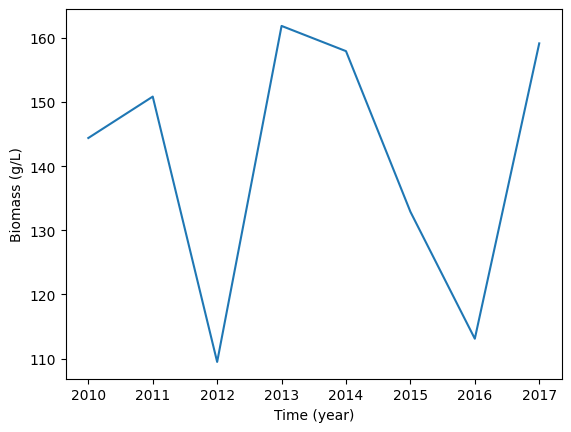

In [6]:
biomass_growth = biomass.iloc[:, 3:].mean()
# plot the curve
biomass_growth.plot()
plt.xlabel('Time (year)')
plt.ylabel('Biomass (g/L)')
plt.show()


In [7]:
melted = pd.melt(biomass, id_vars=['Index', 'Latitude', 'Longitude'], value_vars=biomass.iloc[:, 3:].columns)
melted

Index  Latitude  Longitude variable      value
0          0  24.66818   71.33144     2010   8.475744
1          1  24.66818   71.41106     2010  24.029778
2          2  24.66818   71.49069     2010  44.831635
3          3  24.66818   71.57031     2010  59.974419
4          4  24.66818   71.64994     2010  14.653370
...      ...       ...        ...      ...        ...
19339   2413  20.15456   72.84432     2017   5.321604
19340   2414  20.15456   72.92394     2017   0.120626
19341   2415  20.15456   73.00357     2017   0.038879
19342   2416  20.15456   73.08319     2017   1.304297
19343   2417  20.15456   73.16282     2017   0.226953

[19344 rows x 5 columns]

In [8]:
fig = px.scatter(melted, x='Latitude', y='Longitude', color='value', title='Biomass', animation_frame='variable',
           labels={'variable': 'Year', 'value': 'Biomass (kg)'}, template='plotly_white', width=900, height=650)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1500
fig.show()

## Clustering

Agglomerative clustering using sklearn

In [9]:
D = distance.iloc[:, 1:].to_numpy()
GEO_POINTS = biomass.iloc[:, 1:3].to_numpy()

In [10]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

def generate_cost_matrix(biomass_data, year: str):
    b = biomass_data[year].to_numpy()
    costs = b * D
    return costs

def cluster(cost_matrix, n_clusters):
    # standardize the data
    scaler = StandardScaler()
    data = scaler.fit_transform(cost_matrix)

    # cluster
    c = AgglomerativeClustering(n_clusters=n_clusters)
    c.fit(data)

    score = silhouette_score(data, c.labels_)

    return c, score
    

def plot_clustering(data, c):
    # plot
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], c=c.labels_, cmap='rainbow')
    # label the colors
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('Clusters')
    # relate the number of the cluster to the color
    plt.colorbar()

    plt.show()
    


In [11]:

# cluster the biomass_i_j x distance_i_j matrix
cost_matrix = generate_cost_matrix(biomass, '2010')
c, score = cluster(cost_matrix, 6)

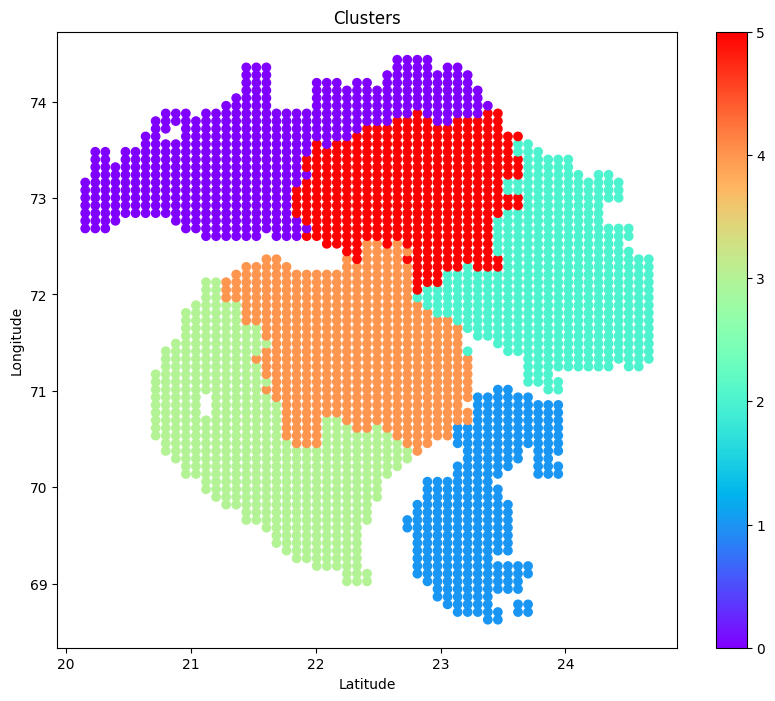

In [12]:
plot_clustering(GEO_POINTS, c)

In [13]:
# print function to print matrix in a efficient way
def print_matrix(matrix):
    df = pd.DataFrame(matrix)
    print(df.to_string())

print_matrix(cost_matrix[:10, :10])

             0            1            2            3           4           5            6            7            8            9
0     0.000000   273.384376   917.062466  2286.386769  664.984579  957.767122  1852.750975  5737.370635  6035.023719  7702.795134
1    96.427695     0.000000   407.017443  1734.106338  530.047557  797.384257  1635.716641  3782.187851  5493.702773  7550.159718
2   173.377282   218.161544     0.000000  1342.173512  434.287785  683.564777  1481.693111  3466.251747  5109.547486  7591.087495
3   323.118255   694.799390  1003.291632     0.000000  173.412375  410.010331   986.103178  2449.667506  3873.455103  5608.144489
4   384.637750   869.214725  1328.693085   709.755263    0.000000  203.896597   575.042233  1606.478281  3173.769300  4423.771889
5   466.093890  1100.152902  1759.543025  1411.875782  171.547001    0.000000   299.123966  1040.500628  2704.688360  3628.780201
6   669.312572  1676.302863  2834.448710  2530.728548  357.521711  221.045020     0.000000

In [14]:
year = '2010'
cost_matrix = generate_cost_matrix(biomass, year)
c, _ = cluster(cost_matrix, 9)

In [16]:
import pulp
import numpy as np
def add_constraints(prob, x, y,biomass_array, harvesting_sites, depots_locations, n_depots, capacity):
    # Constraint 1: Number of warehouses must be less or equal to the maximum number of warehouses
    prob += (
        pulp.lpSum([y[j] for j in depots_locations]) <= n_depots, 
        "Maximum_number_of_warehouses"
        )

    # Constraint 2: Each harvesting site must be assigned to exactly one warehouse
    for i in harvesting_sites:
        prob += (
            pulp.lpSum([x[i][j] for j in depots_locations]) == 1,
            f"Harvesting_site_{i}_must_be_assigned_to_exactly_one_warehouse"
        )

    # Constraint 3: If a harvesting site is assigned to a warehouse, the warehouse must be selected
    for i in harvesting_sites:
        for j in depots_locations:
            prob += (
                x[i][j] <= y[j],
                f"Harvesting_site_{i}_must_be_assigned_to_warehouse_{j}_only_if_warehouse_{j}_is_selected"
            )

    # Constraint 4: Limit the capacity of each warehouse
    for j in depots_locations:
        prob += (
            pulp.lpSum([x[i][j] * biomass_array[i] for i in harvesting_sites]) <= capacity,
            f"Limit_the_capacity_of_warehouse_{j}"
        )
    
    return prob



def create_problem(cost_matrix: np.ndarray, biomass_array: np.ndarray, subset_indices, n_depots:int, capacity: int):
    n_harvesting_sites = len(biomass_array[subset_indices])
    depots_locations = subset_indices
    harvesting_sites = subset_indices

    x = pulp.LpVariable.dicts('x%s_y%s', (harvesting_sites, depots_locations), cat=pulp.LpBinary)
    y = pulp.LpVariable.dicts('y%s', depots_locations, cat=pulp.LpBinary)

    prob = pulp.LpProblem("p-median", pulp.LpMinimize)
    
    cost_of_transportation = pulp.lpSum([(x[i][j] * cost_matrix[i][j] for j in depots_locations) for i in harvesting_sites])
    cost_of_underutilization = pulp.lpSum([(capacity - pulp.lpSum([x[i][j]*biomass_array[i] for i in harvesting_sites])) for j in depots_locations])
    a = 0.001
    b = 1

    prob += a * cost_of_transportation + b * cost_of_underutilization
    prob = add_constraints(prob, x, y, biomass_array, harvesting_sites, depots_locations, n_depots, capacity)
    return prob


In [17]:
def optimize_cluster(cost_matrix, biomass_data, cluster_labels, cluster_num, capacity):
    """
    Optimize the depot locations for a specific cluster
    
    Parameters:
    cost_matrix (numpy.ndarray): The cost matrix for the entire dataset
    biomass_data (numpy.ndarray): The biomass data for the entire dataset
    cluster_labels (numpy.ndarray): The cluster labels for each data point
    cluster_num (int): The cluster number to optimize for
    capacity (int): The capacity of each depot
    
    Returns:
    prob (pulp.LpProblem): The optimized problem for the specified cluster
    """
    # get subsets of data for the specified cluster
    cluster_idx = np.where(cluster_labels == cluster_num)[0]
    biomass_cluster = biomass_data[cluster_idx]

    # n_depots the minimum number of depots required for atleast 80 % of a cluster’s total biomass production
    n_depots = int(np.ceil(0.8 * biomass_cluster.sum() / capacity))

    print(f"[i] Creating MIP problem for cluster {cluster_num} of 6.")
    # create the problem
    prob = create_problem(cost_matrix, biomass_data, cluster_idx, n_depots, capacity)
    
    # log message
    print(f"[*] Optimizing cluster {cluster_num} of 6 with {len(cluster_idx)} data points and {n_depots} depots.\n------------------------------")
    
    # solve the problem
    prob.solve(pulp.CPLEX_PY(mip=True, msg=True))
    
    return prob


In [17]:
#solved_probs = []
#for cluster_num in range(6):
#    solved_probs.append(optimize_cluster(cost_matrix, biomass[year], c.labels_, cluster_num, 20_000))

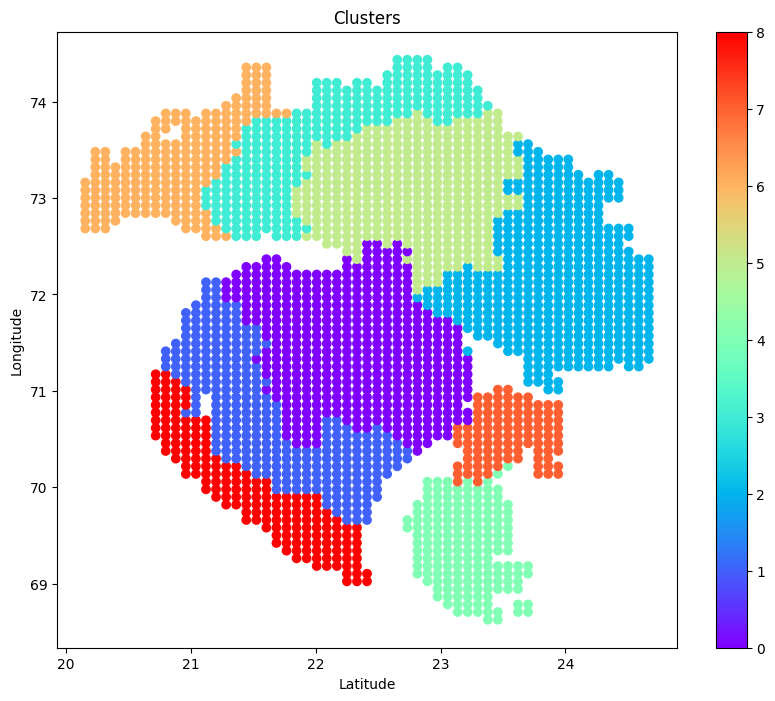

In [18]:
# plot the second cluster

plot_clustering(GEO_POINTS, c)


In [19]:
# optimize cluster 2
optimize_cluster(cost_matrix, biomass[year], c.labels_, 0, 20_000)

[i] Creating MIP problem for cluster 0 of 6.
[*] Optimizing cluster 0 of 6 with 448 data points and 6 depots.
------------------------------
Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced MIP has 201601 rows, 201152 columns, and 803264 nonzeros.
Reduced MIP has 201152 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 7.27 sec. (2591.94 ticks)
Probing time = 0.20 sec. (58.51 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 201601 rows, 201152 columns, and 803264 nonzeros.
Reduced MIP has 201152 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 7.56 sec. (2700.70 ticks)
Probing time = 0.27 sec. (58.40 ticks)
Clique table members: 201152.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 6 threads.
Root relaxation solution time = 109.55 sec. (30117.97 ticks)

        Nodes 

In [ ]:
print_matrix(cost_matrix[:10, :10])

             0            1            2            3           4           5            6            7            8            9
0     0.000000   273.384376   917.062466  2286.386769  664.984579  957.767122  1852.750975  5737.370635  6035.023719  7702.795134
1    96.427695     0.000000   407.017443  1734.106338  530.047557  797.384257  1635.716641  3782.187851  5493.702773  7550.159718
2   173.377282   218.161544     0.000000  1342.173512  434.287785  683.564777  1481.693111  3466.251747  5109.547486  7591.087495
3   323.118255   694.799390  1003.291632     0.000000  173.412375  410.010331   986.103178  2449.667506  3873.455103  5608.144489
4   384.637750   869.214725  1328.693085   709.755263    0.000000  203.896597   575.042233  1606.478281  3173.769300  4423.771889
5   466.093890  1100.152902  1759.543025  1411.875782  171.547001    0.000000   299.123966  1040.500628  2704.688360  3628.780201
6   669.312572  1676.302863  2834.448710  2530.728548  357.521711  221.045020     0.000000

In [ ]:
prob = create_problem(cost_matrix, biomass[year], c0_idx, n_depots, 20_000)

In [ ]:
# get solution
# print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

if pulp.LpStatus[prob.status] == "Optimal":
    print("Objective = ", pulp.value(prob.objective))
    print("Variables:")
    for v in prob.variables():
        print(v.name, "=", v.varValue)
else:
    print("No optimal solution found.")

Status: Optimal
Objective =  8987425.742430469
Variables:
x1024_y1024 = -0.0
x1024_y1025 = -0.0
x1024_y1026 = -0.0
x1024_y1027 = -0.0
x1024_y1028 = -0.0
x1024_y1029 = -0.0
x1024_y1030 = -0.0
x1024_y1078 = -0.0
x1024_y1079 = -0.0
x1024_y1080 = -0.0
x1024_y1081 = -0.0
x1024_y1082 = -0.0
x1024_y1083 = -0.0
x1024_y1084 = -0.0
x1024_y1085 = -0.0
x1024_y1132 = -0.0
x1024_y1133 = -0.0
x1024_y1134 = -0.0
x1024_y1135 = -0.0
x1024_y1136 = -0.0
x1024_y1137 = -0.0
x1024_y1138 = -0.0
x1024_y1139 = -0.0
x1024_y1186 = -0.0
x1024_y1187 = -0.0
x1024_y1188 = -0.0
x1024_y1189 = -0.0
x1024_y1190 = -0.0
x1024_y1191 = -0.0
x1024_y1192 = -0.0
x1024_y1242 = -0.0
x1024_y1243 = -0.0
x1024_y1244 = -0.0
x1024_y1245 = -0.0
x1024_y1246 = -0.0
x1024_y1301 = -0.0
x1024_y1302 = -0.0
x1024_y1303 = -0.0
x1024_y1304 = -0.0
x1024_y1305 = -0.0
x1024_y1306 = -0.0
x1024_y1366 = -0.0
x1024_y1367 = -0.0
x1024_y1368 = -0.0
x1024_y1369 = -0.0
x1024_y1370 = -0.0
x1024_y1371 = -0.0
x1024_y1372 = -0.0
x1024_y1431 = -0.0
x1024_y1432

# Solution analysis

In [ ]:
#